In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import csv

# Change the timestampe to normal time

In [5]:
datapath=Path(r'D:\studydata\Masterarbeit\Data\test')
data_name=os.listdir(datapath)
filepath=[]
for file in data_name:
    if file.endswith('.csv'):
       filepath.append(os.path.join(datapath,file))
filepath

['D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_0.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_10000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_100000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_110000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_120000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_130000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_140000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_150000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_160000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_170000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_180000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_190000.csv',
 'D:\\studydata\\Masterarbeit\\Data\\test\\axis2_demo_tablepart1_20000

# The length of the data in each timeperiod

In [6]:
data=filepath[-1]
df=pd.read_csv(data)

In [7]:
all_rows=pd.DataFrame()
# Iterate over each unique time value
for file in filepath:
    df=pd.read_csv(file)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    rows=[]
# Iterate over each unique time value
    for time in np.unique(df['Timestamp']):
        # Filter the DataFrame for the current time
        df_filtered = df[df['Timestamp'] == time]
        
        # Create a dictionary for the current row and append it to the list
        rows.append({'time': time, 'number_of_rows': len(df_filtered)})
    df1 = pd.DataFrame(rows)
# Concatenate the list of DataFrames
    all_rows= pd.concat([all_rows, df1], axis=0, ignore_index=True)
# Save the result to a CSV file
all_rows.to_csv(r'D:\studydata\Masterarbeit\Data\all_rows.csv',index=False)
all_rows.to_csv(r'all_rows.csv',index=False)


In [3]:
# combine the all_rows.csv files with the same time value, add the number of rows together
df=pd.read_csv(r'all_rows.csv')
df_time=df.groupby(df["time"]).sum().reset_index()
df_time.to_csv(r'all_rows.csv',index=False)
df_time

,time,number_of_rows
0,2020-11-04 11:40:00,2201
1,2020-11-04 14:26:40,2348
2,2020-11-05 12:40:00,1235
3,2020-11-06 10:53:20,432
4,2020-11-24 15:00:00,4
...,...,...
183,2022-05-24 08:13:20,1078
184,2022-05-24 11:00:00,8739
185,2022-05-28 12:13:20,330
186,2022-06-23 13:13:20,96


In [4]:
all=np.sort(df_time.number_of_rows)
total=np.sum(all)
total

1445916

In [5]:
np.sort(df_time.number_of_rows)

array([    4,     5,    20,    25,    28,    44,    50,    58,    69,
          83,    96,   107,   120,   127,   169,   201,   206,   210,
         214,   256,   268,   330,   353,   360,   369,   432,   592,
         619,   620,   783,   796,   804,  1070,  1078,  1088,  1111,
        1219,  1235,  1257,  1370,  1473,  1626,  1725,  1842,  1903,
        2201,  2292,  2348,  2523,  2588,  2649,  2908,  2927,  3203,
        3206,  3267,  3267,  3281,  3310,  3444,  3495,  3524,  3553,
        3580,  3623,  3922,  4582,  4778,  4924,  4934,  4939,  4967,
        4968,  4971,  4971,  5123,  5182,  5248,  5565,  5674,  5748,
        5967,  6267,  6269,  6270,  6278,  6288,  6289,  6348,  6405,
        7091,  7116,  8003,  8223,  8262,  8449,  8739,  8886,  9266,
        9308,  9561, 10286, 10553, 11064, 11110, 11161, 11169, 11176,
       11178, 11180, 11196, 11196, 11196, 11230, 11256, 11292, 11294,
       11298, 11299, 11303, 11305, 11305, 11306, 11308, 11308, 11326,
       11330, 11335,

In [9]:
index=np.where(np.sort(df_time.number_of_rows)>5000)
index

(array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181, 182, 183, 184, 185, 186, 187], dtype=int64),)

In [10]:
index=np.array(list(index)).flatten().tolist()
after=[all[i] for i in index]
after=np.array(after).flatten().tolist()
number=np.sum(after)
number

1310356

In [11]:
round(number/total,5)

0.90625

1437498

In [50]:
round(number/total,5)

0.99418

# Classification 

In [1]:
import pandas as pd
import numpy as np


C:\Users\lia68085\AppData\Local\Temp\ipykernel_5908\2937650959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import json
import pandas as pd
data = pd.read_csv('axis2_demo_tablepart1_0.csv')
with open('important_features.json', 'r') as file:
    features = json.load(file)[:12]

data_selected = data[features]
data_selected.to_csv(r'afterselect.csv',index=False)

In [9]:
df=pd.read_csv('axis2_demo_tablepart1_0.csv')
df.columns

Index(['ID', 'Schadensklasse', 'Mittelwert_x', 'Mittelwert_y', 'Mittelwert_z',
       'Variance_x', 'Variance_y', 'Variance_z', 'Effektivwert_x',
       'Effektivwert_y', 'Effektivwert_z', 'Standardabweichung_x',
       'Standardabweichung_y', 'Standardabweichung_z', 'Woehlbung_x',
       'Woehlbung_y', 'Woehlbung_z', 'Schiefe_x', 'Schiefe_y', 'Schiefe_z',
       'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_y',
       'Mittlere_Absolute_Abweichung_z', 'Zentrales_Moment_x',
       'Zentrales_Moment_y', 'Zentrales_Moment_z', 'Median_x', 'Median_y',
       'Median_z', 'Timestamp'],
      dtype='object')

In [23]:
np.unique(df.Schadensklasse)
for i in np.unique(df.Schadensklasse):
    length=len(df.Schadensklasse[df.Schadensklasse==i])
    print(length)

3642
2619
3739


In [20]:
df_train= df.head(10000)
df_test = df.tail(3000)

# Xgboost

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from pathlib import Path
from sklearn import linear_model 
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb
from sklearn import ensemble
from sklearn import model_selection

In [60]:

data = pd.read_csv('axis2_demo_tablepart1_0.csv')
cols = ['Mittelwert_x', 'Mittelwert_y', 'Mittelwert_z',
        'Variance_x', 'Variance_y', 'Variance_z', 'Effektivwert_x',
        'Effektivwert_y', 'Effektivwert_z', 'Standardabweichung_x',
        'Standardabweichung_y', 'Standardabweichung_z', 'Woehlbung_x',
        'Woehlbung_y', 'Woehlbung_z', 'Schiefe_x', 'Schiefe_y', 'Schiefe_z',
        'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_y',
        'Mittlere_Absolute_Abweichung_z', 'Zentrales_Moment_x',
        'Zentrales_Moment_y', 'Zentrales_Moment_z', 'Median_x', 'Median_y',
        'Median_z',]
df=data


In [61]:
df.columns

Index(['ID', 'Schadensklasse', 'Mittelwert_x', 'Mittelwert_y', 'Mittelwert_z',
       'Variance_x', 'Variance_y', 'Variance_z', 'Effektivwert_x',
       'Effektivwert_y', 'Effektivwert_z', 'Standardabweichung_x',
       'Standardabweichung_y', 'Standardabweichung_z', 'Woehlbung_x',
       'Woehlbung_y', 'Woehlbung_z', 'Schiefe_x', 'Schiefe_y', 'Schiefe_z',
       'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_y',
       'Mittlere_Absolute_Abweichung_z', 'Zentrales_Moment_x',
       'Zentrales_Moment_y', 'Zentrales_Moment_z', 'Median_x', 'Median_y',
       'Median_z', 'Timestamp'],
      dtype='object')

In [50]:
for i in np.unique(df.Schadensklasse):
    print(i,':',len(df.Schadensklasse[df.Schadensklasse==i] ))

0 : 3642
1 : 2619
2 : 3739


In [ ]:
features = [f for f in df.columns if f not in ('Schadensklasse', 'Timestamp') ]
print(features)
for col in features:
     if df[col].isna().any():
        print(df[col])

In [66]:
features =[features for features in df.columns if features not in ['Schadensklasse' , 'Timestamp']]
X=df[features].values
y=df.Schadensklasse.values
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200, 250, 300, 400, 500],
    "max_depth": [1, 2, 5, 7, 11, 15],
    "criterion": ["gini", "entropy"]}
model = model_selection.GridSearchCV(
    estimator=classifier, 
    param_grid=param_grid, 
    scoring="accuracy",
    verbose=10, 
    n_jobs=1,
    cv=5
    )


model.fit(X, y)
print(f"Best score: {model.best_score_}")
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")






Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.735 total time=   0.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.738 total time=   0.1s
[CV 3/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.738 total time=   0.1s
[CV 4/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.737 total time=   0.1s
[CV 5/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5; 2/72] START criterion=gini, max_de

In [75]:
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
print(f"Best score: {model.best_score_}")
name = (
        f"_d{best_parameters['criterion']}-a{best_parameters['n_estimators']:.2f}-rs{best_parameters['max_depth']}"
        )
best_model = model.best_estimator_


Best score: 0.9602


# RandomSearch

In [84]:
import time

features =[features for features in df.columns if features not in ['Schadensklasse' , 'Timestamp']]
X=df[features].values
y=df.Schadensklasse.values
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": np.arange(100, 1500, 100),
    "max_depth": np.arange(1, 31),
    "criterion": ["gini", "entropy"]}
model = model_selection.RandomizedSearchCV(
    estimator=classifier, 
    param_distributions=param_grid, 
    scoring="accuracy",
    verbose=10, 
    n_jobs=1,
    cv=5,
    n_iter=20
    )
start_time = time.time()


model.fit(X, y)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training completed in: {elapsed_time:.2f} seconds")
print(f"Best score: {model.best_score_}")
print("Best parameters set:")


best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")


name = (
        f"_d{best_parameters['criterion']}-a{best_parameters['n_estimators']:.2f}-rs{best_parameters['max_depth']}"
        )
best_model = model.best_estimator_


path=Path('model')
print(f"Saving model to {path}...")
pickle.dump(
    best_model, open(path.joinpath(f"{name}.p"), "wb"))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START criterion=gini, max_depth=18, n_estimators=1100............
[CV 1/5; 1/20] END criterion=gini, max_depth=18, n_estimators=1100;, score=0.976 total time=   3.8s
[CV 2/5; 1/20] START criterion=gini, max_depth=18, n_estimators=1100............
[CV 2/5; 1/20] END criterion=gini, max_depth=18, n_estimators=1100;, score=0.984 total time=   9.6s
[CV 3/5; 1/20] START criterion=gini, max_depth=18, n_estimators=1100............
[CV 3/5; 1/20] END criterion=gini, max_depth=18, n_estimators=1100;, score=0.973 total time=   8.8s
[CV 4/5; 1/20] START criterion=gini, max_depth=18, n_estimators=1100............
[CV 4/5; 1/20] END criterion=gini, max_depth=18, n_estimators=1100;, score=0.983 total time=   9.3s
[CV 5/5; 1/20] START criterion=gini, max_depth=18, n_estimators=1100............
[CV 5/5; 1/20] END criterion=gini, max_depth=18, n_estimators=1100;, score=0.882 total time=   8.8s
[CV 1/5; 2/20] START criterion=gi

In [6]:

data = pd.read_csv('axis2_demo_tablepart1_0.csv')
cols = ['Mittelwert_x', 'Mittelwert_y', 'Mittelwert_z',
        'Variance_x', 'Variance_y', 'Variance_z', 'Effektivwert_x',
        'Effektivwert_y', 'Effektivwert_z', 'Standardabweichung_x',
        'Standardabweichung_y', 'Standardabweichung_z', 'Woehlbung_x',
        'Woehlbung_y', 'Woehlbung_z', 'Schiefe_x', 'Schiefe_y', 'Schiefe_z',
        'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_y',
        'Mittlere_Absolute_Abweichung_z', 'Zentrales_Moment_x',
        'Zentrales_Moment_y', 'Zentrales_Moment_z', 'Median_x', 'Median_y',
        'Median_z',]
df=data
features =[features for features in df.columns if features not in ['Schadensklasse' , 'Timestamp','ID']]


In [36]:
import numpy as np
import time
from joblib import dump
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Assuming 'df' is your DataFrame and you've defined X and y based on your features and target variable
X = df[features].values
y = df.Schadensklasse.values

# Define the XGBoost classifier
classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=3)

# Define the parameter grid
param_grid = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_depth": np.arange(10, 100),
    "learning_rate": np.arange(0.1, 0.5, 0.01),
    "subsample": np.arange(0.5, 1.01, 0.05),
    "colsample_bytree": np.arange(0.5, 1.01, 0.05),
    "gamma": np.arange(0, 5),
}

# Initialize RandomizedSearchCV
model = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
    n_iter=20
)


# Train the model
model.fit(X, y)


# Output the results
print("Best parameters set:")
print(f"Best score: {model.best_score_}")

best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

# Save the best model
dump(model.best_estimator_, 'best_xgboost_model.joblib')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55
[CV 1/5; 1/20] END colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55;, score=0.976 total time=   0.1s
[CV 2/5; 1/20] START colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55
[CV 2/5; 1/20] END colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55;, score=0.987 total time=   0.1s
[CV 3/5; 1/20] START colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55
[CV 3/5; 1/20] END colsample_bytree=0.9500000000000004, gamma=1, learning_rate=0.11, max_depth=94, n_estimators=100, subsample=0.55;, score=0.973 total time=   0.1s
[CV 4/5; 1/20] START colsample_bytree=0.9

['best_xgboost_model.joblib']

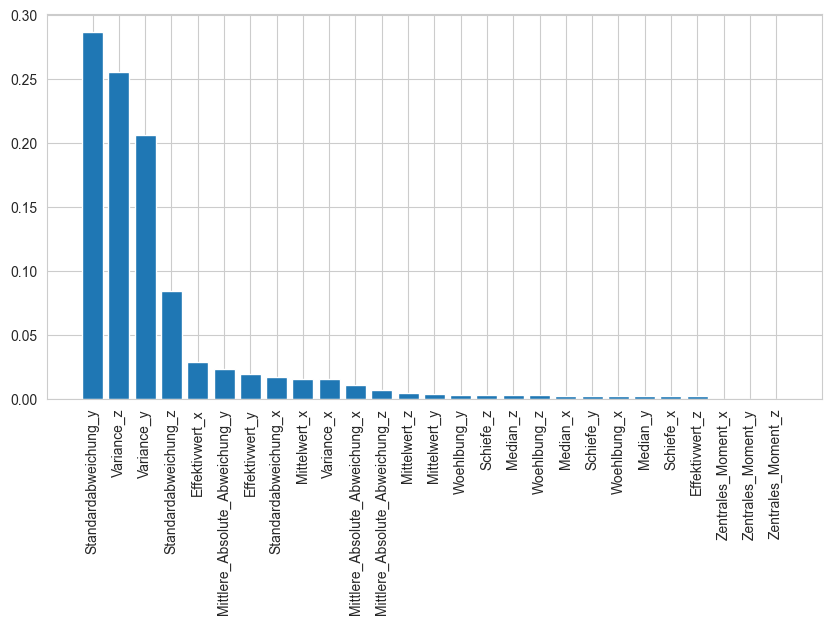

In [7]:
#load the saved model
from joblib import load
import seaborn as sns

best_model = load('best_xgboost_model.joblib')
feature_importances=best_model.feature_importances_
df_trst=pd.DataFrame(zip(features, feature_importances), columns=["featurea","importance"])
# for feature, importance in zip(features, feature_importances):
#     print(f"Feature: {feature}, Importance: {importance}")
# Assuming df_trst is your DataFrame containing the features and their importances
df_sorted = df_trst.sort_values(by="importance", ascending=False)
# plot the feature importances
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.bar(df_sorted["featurea"], df_sorted["importance"])
plt.xticks(rotation=90)
plt.show()




In [10]:
X = df[features].values
X.shape

(10000, 27)

In [18]:
X = df[features].values
y = df.Schadensklasse.values

In [27]:
best_model = load('best_xgboost_model.joblib')

test=X[0].reshape(1,27)
best_model.predict(test)

array([[ 6.34880e+02, -6.80704e+02,  1.56687e+04,  1.35546e+07,
         1.51523e+08,  3.35081e+07,  3.73418e+03,  1.23221e+04,
         1.67028e+04,  3.67981e+03,  1.23033e+04,  5.78572e+03,
        -6.00847e-02, -1.20927e+00, -3.41908e-01, -1.58404e-01,
         3.55905e-02, -1.60845e-03,  2.92098e+03,  1.07357e+04,
         4.71124e+03,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         7.68000e+02, -7.68000e+02,  1.54880e+04]])

In [28]:
best_model.predict(test)

array([1], dtype=int64)

In [48]:
feature_importances = best_model.feature_importances_
df_trst = pd.DataFrame(zip(features, feature_importances), columns=["feature", "importance"])
df_sorted = df_trst.sort_values(by="importance", ascending=False)
important_features = df_sorted["feature"].tolist()
import json
# Convert the list to a JSON string
json_data = json.dumps(important_features)

# Save the JSON string to a file
with open('important_features.json', 'w') as file:
    file.write(json_data)


# Time series forecasting

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\studydata\Masterarbeit\Data\all_data.csv")
#drop the columns "ID" and "Schadensklasse" from the DataFrame
df=df#.drop(columns=["ID","Schadensklasse"])
df.head()
# use column "Timestamp" as the index of the DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
timetitle=df.columns[-1]
df[timetitle]

0         2020-11-04 11:40:00
1         2020-11-04 11:40:00
2         2020-11-04 11:40:00
3         2020-11-04 11:40:00
4         2020-11-04 11:40:00
                  ...        
1445911   2022-07-11 11:46:40
1445912   2022-07-11 11:46:40
1445913   2022-07-11 11:46:40
1445914   2022-07-11 11:46:40
1445915   2022-07-11 11:46:40
Name: Timestamp, Length: 1445916, dtype: datetime64[ns]

In [3]:
df.head()

,ID,Schadensklasse,Mittelwert_x,Mittelwert_y,Mittelwert_z,Variance_x,Variance_y,Variance_z,Effektivwert_x,Effektivwert_y,...,Mittlere_Absolute_Abweichung_x,Mittlere_Absolute_Abweichung_y,Mittlere_Absolute_Abweichung_z,Zentrales_Moment_x,Zentrales_Moment_y,Zentrales_Moment_z,Median_x,Median_y,Median_z,Timestamp
0,1,2,569.600,-547.072,15889.7,108005.0,26911.8,220962,657.526,571.115,...,256.806,117.401,350.131,0,0,0,512,-512,15872,2020-11-04 11:40:00
1,2,2,545.792,-545.280,15879.7,96078.5,29592.9,235057,627.592,571.746,...,233.196,122.691,363.095,0,0,0,512,-512,15872,2020-11-04 11:40:00
2,3,2,565.248,-544.512,15885.8,105404.0,24460.9,256573,651.770,566.507,...,261.509,111.817,395.262,0,0,0,512,-512,15872,2020-11-04 11:40:00
3,4,2,566.784,-541.440,15920.1,106026.0,30555.6,241982,653.578,568.931,...,262.385,123.620,389.710,0,0,0,512,-512,15872,2020-11-04 11:40:00
4,5,2,567.040,-563.456,15917.1,115510.0,26411.1,268509,661.006,586.402,...,278.083,128.562,414.196,0,0,0,512,-512,15872,2020-11-04 11:40:00


In [4]:
alldate=np.unique(df[timetitle])
length=[]
for x in alldate:
    length.append(len(df[df[timetitle]==x]))

x=0
index=[]
for i in length:
    x+=i
    index.append(x)
# for x in index:
#   print(x)
# index[:-1]

In [5]:
for x in index[:-1]:
    timetitle=df['Timestamp'][x]
    print(timetitle)
    fig, axs = plt.subplots(len(df.columns), 1, figsize=(10, 2*len(df.columns)))

    for i, count in enumerate(df.columns):
        axs[i].plot(df[count][x-200:x+200], label=count)
        axs[i].set_title(count)
        # 添加垂直线
        axs[i].axvline(x, color='red', linestyle='--')  # 200 是中心点，因为范围是 x-200 到 x+200

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局，给 suptitle 留出空间

    fig.suptitle(timetitle, fontsize=16)
    output_path = f'D:/studydata/Masterarbeit/picture/figure{x}.png'

    plt.savefig(output_path)
    plt.close(fig)  # 关闭图像，释放内存

2020-11-04 14:26:40
2020-11-05 12:40:00
2020-11-06 10:53:20
2020-11-24 15:00:00
2020-11-27 15:13:20
2021-01-14 13:13:20
2021-01-14 16:00:00
2021-01-14 18:46:40
2021-01-14 21:33:20
2021-01-15 00:20:00
2021-01-15 03:06:40
2021-02-12 14:26:40
2021-05-25 10:53:20
2021-05-25 13:40:00
2021-05-25 16:26:40
2021-05-25 19:13:20
2021-05-25 22:00:00
2021-05-26 00:46:40
2021-05-26 03:33:20
2021-05-26 06:20:00
2021-05-26 09:06:40
2021-05-26 11:53:20
2021-05-26 14:40:00
2021-05-26 17:26:40
2021-05-26 20:13:20
2021-05-26 23:00:00
2021-05-27 01:46:40
2021-05-27 04:33:20
2021-05-27 07:20:00
2021-05-27 10:06:40
2021-05-28 08:20:00
2021-05-31 08:33:20
2021-05-31 11:20:00
2021-05-31 14:06:40
2021-05-31 16:53:20
2021-05-31 19:40:00
2021-05-31 22:26:40
2021-06-01 01:13:20
2021-06-01 04:00:00
2021-06-01 06:46:40
2021-06-01 09:33:20
2021-06-01 12:20:00
2021-06-01 15:06:40
2021-06-01 17:53:20
2021-06-01 20:40:00
2021-10-21 12:40:00
2021-10-21 15:26:40
2021-10-27 07:33:20
2021-12-02 13:00:00
2021-12-06 08:40:00


In [ ]:
# 2022-03-28 12:20:00
# 2022-07-11 11:46:40
# 2022-05-24 08:13:20
# 2022-05-18 07:46:40
# 2022-05-18 07:46:40
# 2022-05-09 09:53:20 normal
# 2022-04-28 12:46:40 normal
# 2022-04-06 13:00:00
# 2022-04-05 14:46:40
# 2022-03-28 09:33:20
# 2021-12-02 13:00:00
# 2021-10-21 12:40:00
# 2021-02-12 14:26:40

# Proportion

In [126]:
df=pd.read_csv(r"D:\studydata\Masterarbeit\Data\all_data.csv")
#drop the columns "ID" and "Schadensklasse" from the DataFrame
df=df.drop(columns=["ID","Schadensklasse"])
df.head()
# use column "Timestamp" as the index of the DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
timetitle=df.columns[-1]
# df[timetitle]
alldate=np.unique(df[timetitle])


0.7804955474591885

In [127]:
length=[]
for x in alldate:
    length.append(len(df[df[timetitle]==x]))
def Proportion(i):
    select=[]
    for x in length:
        if x > i:
            select.append(x)
    return sum(select)
Proportion(10000)/len(df)

0.7804955474591885

In [125]:
Proportion(10000)/len(df)

6002.824468085107

# difference

In [111]:
df=pd.read_csv(r'all_rows.csv')
# df_time=df.groupby(df["time"]).sum().reset_index()


In [114]:
df.time

0      2020-11-04 11:40:00
1      2020-11-04 14:26:40
2      2020-11-05 12:40:00
3      2020-11-06 10:53:20
4      2020-11-24 15:00:00
              ...         
183    2022-05-24 08:13:20
184    2022-05-24 11:00:00
185    2022-05-28 12:13:20
186    2022-06-23 13:13:20
187    2022-07-11 11:46:40
Name: time, Length: 188, dtype: object

In [115]:
df['time'] = pd.to_datetime(df['time'])
# 计算每两个连续时间点之间的秒数差
time_diffs = df['time'].diff().dropna()
seconds_diffs = time_diffs.dt.total_seconds()

print(seconds_diffs)

1        10000.0
2        80000.0
3        80000.0
4      1570000.0
5       260000.0
         ...    
183     320000.0
184      10000.0
185     350000.0
186    2250000.0
187    1550000.0
Name: time, Length: 187, dtype: float64


In [122]:
x=[]
for diff in seconds_diffs:
    if diff>10000:
        x.append(diff)

len(x)

46

In [128]:
x=[]
for diff in seconds_diffs:
    if diff==10000:
        x.append(diff)

x

[10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,


# ALL Data

In [5]:
# 加载数据
import pandas as pd
import numpy as np
import os
folderpath=r"D:\studydata\Masterarbeit\Data\withoutR"
files=os.listdir(folderpath)
file_path=[]
for file in files:
    if file.endswith('.csv'):
       file_path.append(os.path.join(folderpath,file))
file_path
# combine all the csv files into one dataframe

all_data = pd.DataFrame()
for file in file_path:
    data = pd.read_csv(file)
    all_data = pd.concat([all_data, data], axis=0, ignore_index=True)
print(len(all_data))
all_data.to_csv(r'D:\studydata\Masterarbeit\Data\all_data.csv',index=False)

1445916


In [27]:
1445916/18

80328.66666666667

In [6]:
all_data.Timestamp = pd.to_datetime(all_data.Timestamp, unit='s')


In [8]:
Time=all_data.Timestamp


In [12]:
Time[0]
# create a new date column start from first time value in the column "Timestamp", and interval is 2.5 ms
all_data['Date'] = pd.date_range(start=Time[0], periods=len(all_data), freq='2.5ms')
all_data['Date'] = pd.date_range(start=Time[0], periods=len(all_data), freq='s')
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.head()
all_data.to_csv(r'D:\studydata\Masterarbeit\Data\all_second_data.csv',index=False)


In [29]:

# how many days in the column "Date"
len(np.unique(all_data['Date'].dt.date))
# how many data in each day
len(all_data['Date'][all_data['Date'].dt.date==all_data['Date'].dt.date[1]])

for i in np.unique(all_data['Date'].dt.date):
    print(i,":",len(all_data['Date'][all_data['Date'].dt.date==i]))
# how many data in the first day

# 


2020-11-04 : 44400
2020-11-05 : 86400
2020-11-06 : 86400
2020-11-07 : 86400
2020-11-08 : 86400
2020-11-09 : 86400
2020-11-10 : 86400
2020-11-11 : 86400
2020-11-12 : 86400
2020-11-13 : 86400
2020-11-14 : 86400
2020-11-15 : 86400
2020-11-16 : 86400
2020-11-17 : 86400
2020-11-18 : 86400
2020-11-19 : 86400
2020-11-20 : 86400
2020-11-21 : 19116


In [17]:
all_data['Date'].head()

0   2020-11-04 11:40:00
1   2020-11-04 11:40:01
2   2020-11-04 11:40:02
3   2020-11-04 11:40:03
4   2020-11-04 11:40:04
Name: Date, dtype: datetime64[ns]

In [14]:
all_data['Date'].tail()

1445911   2020-11-21 05:18:31
1445912   2020-11-21 05:18:32
1445913   2020-11-21 05:18:33
1445914   2020-11-21 05:18:34
1445915   2020-11-21 05:18:35
Name: Date, dtype: datetime64[ns]

In [18]:
all_data['msDate'] = pd.date_range(start=Time[0], periods=len(all_data), freq='2.5ms')


In [24]:
all_data['msDate'].head()

0   2020-11-04 11:40:00.000000
1   2020-11-04 11:40:00.002500
2   2020-11-04 11:40:00.005000
3   2020-11-04 11:40:00.007500
4   2020-11-04 11:40:00.010000
Name: msDate, dtype: datetime64[ns]

In [25]:
all_data['msDate'].tail()

1445911   2020-11-04 12:40:14.777500
1445912   2020-11-04 12:40:14.780000
1445913   2020-11-04 12:40:14.782500
1445914   2020-11-04 12:40:14.785000
1445915   2020-11-04 12:40:14.787500
Name: msDate, dtype: datetime64[ns]

In [23]:
len(np.unique(all_data['msDate'].dt.date))


1

# Full Process

In [27]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import os

all_data=pd.read_csv("axis2_demo_tablepart1_0.csv")

print(len(all_data))

#data = pd.read_csv('axis2_demo_tablepart1_0.csv')

# Assuming 'important_features.json' contains a JSON array of feature names
import json

with open('important_features.json', 'r') as file:
    features = json.load(file)[:10]

data_selected = all_data[features][:5000]

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)

# 准备数据集
def create_dataset(dataset, look_back=50):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]  # 从当前索引开始，取后50个数据作为输入
        X.append(a)
        b = dataset[i + look_back, :]      # 第51个数据作为输出
        Y.append(b)
    return np.array(X), np.array(Y)


look_back = 2500
X, Y = create_dataset(data_scaled, look_back)

# 划分数据集
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
Y_train, Y_test = Y[:int(0.8 * len(Y))], Y[int(0.8 * len(Y)):]


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

# Create DataLoader instances
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 构建LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out


model = LSTMModel(len(features), 50, len(features))

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, patience=20):
    # patience参数是我们愿意等待验证损失改善的epoch数量
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        
        # 在验证集上评估模型
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in validation_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(validation_loader)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}')

        # 检查验证损失是否改善
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Early stopping at epoch {epoch+1}')
                break  # 提前停止


train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=500, patience=20)


10000
Epoch [10/500], Validation Loss: 0.0073
Epoch [20/500], Validation Loss: 0.0063
Epoch [30/500], Validation Loss: 0.0057
Epoch [40/500], Validation Loss: 0.0055
Epoch [50/500], Validation Loss: 0.0053
Epoch [60/500], Validation Loss: 0.0051
Epoch [70/500], Validation Loss: 0.0050
Epoch [80/500], Validation Loss: 0.0050
Epoch [90/500], Validation Loss: 0.0050
Epoch [100/500], Validation Loss: 0.0048
Epoch [110/500], Validation Loss: 0.0047
Early stopping at epoch 114


In [31]:
for x, y in test_loader:
    print(x.shape, y.shape)
# print the first value in test_loader
#print(x[0].shape)
initial_input = x[0].unsqueeze(0)
print(initial_input.shape)
frist_predict=model(initial_input)
frist_predict.unsqueeze(1).shape
frist_predict

torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([64, 2500, 10]) torch.Size([64, 10])
torch.Size([52, 2500, 10]) torch.Size([52, 10])
torch.Size([1, 2500, 10])


tensor([[0.7334, 0.1792, 0.5559, 0.4098, 0.2586, 0.7018, 0.7275, 0.2778, 0.4182,
         0.0835]], grad_fn=<AddmmBackward0>)

tensor([[0.9188, 0.2785, 0.8329, 0.5104, 0.3399, 0.9033, 0.9234, 0.3869, 0.2957,
         0.1624]], grad_fn=<AddmmBackward0>)

In [18]:
current_window = torch.cat((initial_input[:,1:,:], frist_predict.unsqueeze(1)), dim=1)
second=model(current_window)
second

tensor([[0.0120, 0.0045, 0.0064, 0.0117, 0.0101, 0.0147, 0.0108, 0.0105, 0.4205,
         0.0027]], grad_fn=<AddmmBackward0>)

In [32]:
import torch

# 假设已经有了模型和数据
# model - 已训练的PyTorch模型
# initial_window - 初始的输入窗口，形状为 [1, window_size, feature_dim]
# n_predictions - 需要生成的预测数量

def recursive_prediction(model, initial_window, n_predictions):
    model.eval()
    current_window = initial_window
    predictions = []

    for _ in range(n_predictions):
        # 使用当前窗口进行预测
        with torch.no_grad():
            current_prediction = model(current_window)  # 假设输出形状为 [1, 1, feature_dim]
        
        # 记录预测结果
        predictions.append(current_prediction.numpy().flatten())

        # 更新窗口：移除第一个元素，添加新的预测值
        current_window = torch.cat((current_window[:, 1:, :], current_prediction.unsqueeze(1)), dim=1)
    
    return predictions

# 初始窗口设置
# 假设窗口大小为50，特征维度为10
initial_window = initial_input  # 这里使用随机数据代替真实的初始窗口
n_predictions = 500 # 预测未来100个时间步

# 调用递归预测函数
predicted_values = recursive_prediction(model, initial_window, n_predictions)

# 打印或处理预测结果
predicted_values = np.array(predicted_values)
print(predicted_values.shape)  # 输出形状应为 [n_predictions, feature_dim]
predicted_new = scaler.inverse_transform(predicted_values)



(500, 10)


In [33]:

# 进行预测
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())

predicted = np.vstack(predictions)  # Stack arrays in sequence vertically

# 反归一化以获取实际预测值
predicted_actual = scaler.inverse_transform(predicted)
print(predicted_actual.shape)


(500, 10)


In [167]:
predicted_actual[200]

array([1.01053252e+04, 2.41739640e+07, 1.06958344e+08, 4.82969336e+03,
       2.65804956e+03, 8.60423438e+03, 1.01820117e+04, 2.61301831e+03,
       1.17517769e+02, 7.45377100e+06], dtype=float32)

In [168]:
true_test = scaler.inverse_transform(Y_test)
true_test[200]

array([1.61998001e+02, 2.38134002e+05, 2.62697998e+04, 4.87746001e+02,
       3.56842000e+02, 1.23488000e+02, 3.39622000e+02, 3.14445001e+02,
       1.68704015e+02, 9.89744006e+04])

[ 9698.89993254  9570.90989728  9443.40964455 10344.10031893
 10737.60017026 10634.99962078 10288.00001375 10337.10030822
 10240.90006872  9891.28020599  9632.05027482 11328.99964305
  8734.24010364  9767.95037876  9429.37002026  8520.07986386
  9942.19980817  9410.91022988  9717.30961316  1500.03000077]
[10091.809   9863.85    9660.529   9474.343   9284.876   9084.284
  8875.33    8670.225   8490.9     8368.946   8341.909   8443.392
  8687.191   9050.445   9469.709   9867.325  10194.732  10445.9795
 10635.287  10777.046 ]


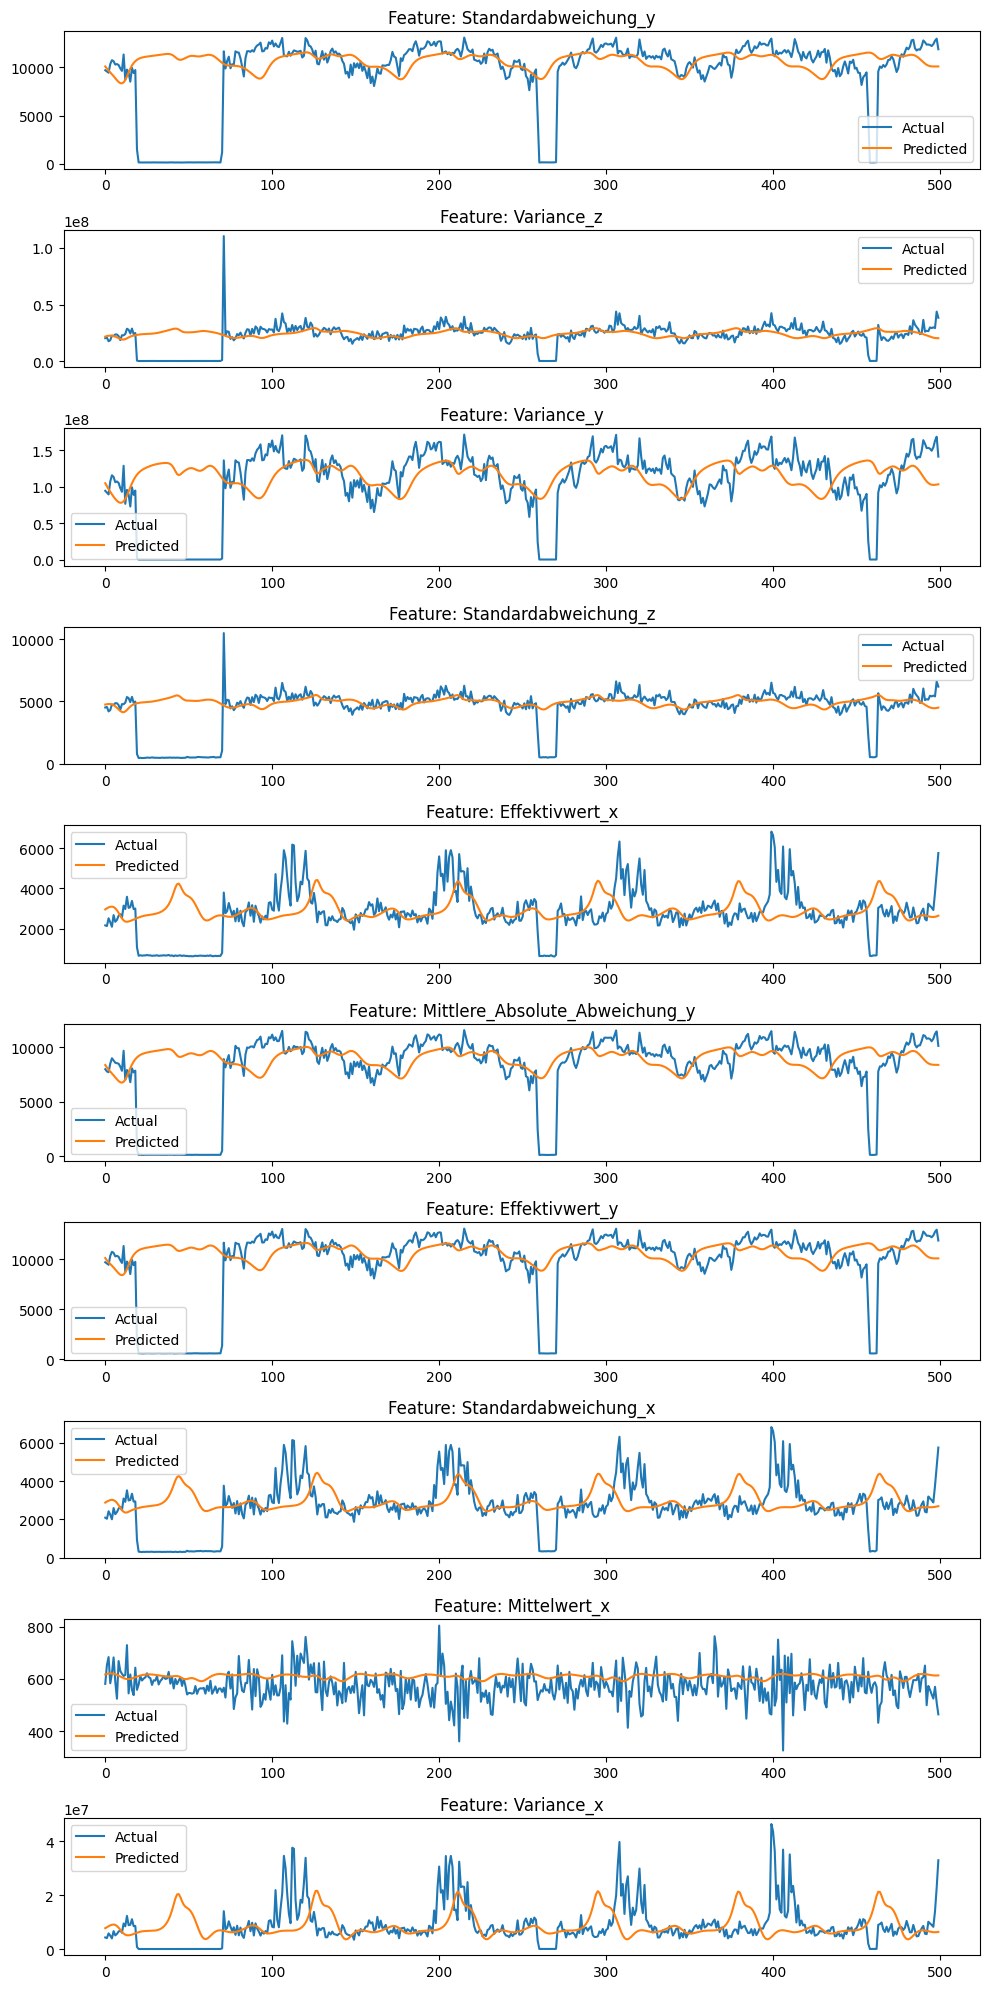

In [36]:
# plot and compare the actual and predicted values for each feature
#torch.save(model.state_dict(), 'lstmb_atch_model.pth')

# print the actual and predicted values for each feature
import matplotlib.pyplot as plt

true_test = scaler.inverse_transform(Y_test)
print(true_test[:20,0])
print(predicted_new[:20,0])
# 创建足够的子图，每个特征一个子图，所有子图排列成一列
fig, axs = plt.subplots(len(features), 1, figsize=(10, 2*len(features)))  # 高度根据特征数量动态调整

for i in range(len(features)):
    # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
    ax = axs[i] if len(features) > 1 else axs
    
    ax.plot(true_test[:, i], label='Actual')
    ax.plot(predicted_new[:, i], label='Predicted')
    ax.set_title(f'Feature: {features[i]}')
    ax.legend()

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()


[ 9698.89993254  9570.90989728  9443.40964455 10344.10031893
 10737.60017026 10634.99962078 10288.00001375 10337.10030822
 10240.90006872  9891.28020599  9632.05027482 11328.99964305
  8734.24010364  9767.95037876  9429.37002026  8520.07986386
  9942.19980817  9410.91022988  9717.30961316  1500.03000077]
[10091.809   9863.85    9660.529   9474.343   9284.876   9084.284
  8875.33    8670.225   8490.9     8368.946   8341.909   8443.392
  8687.191   9050.445   9469.709   9867.325  10194.732  10445.9795
 10635.287  10777.046 ]


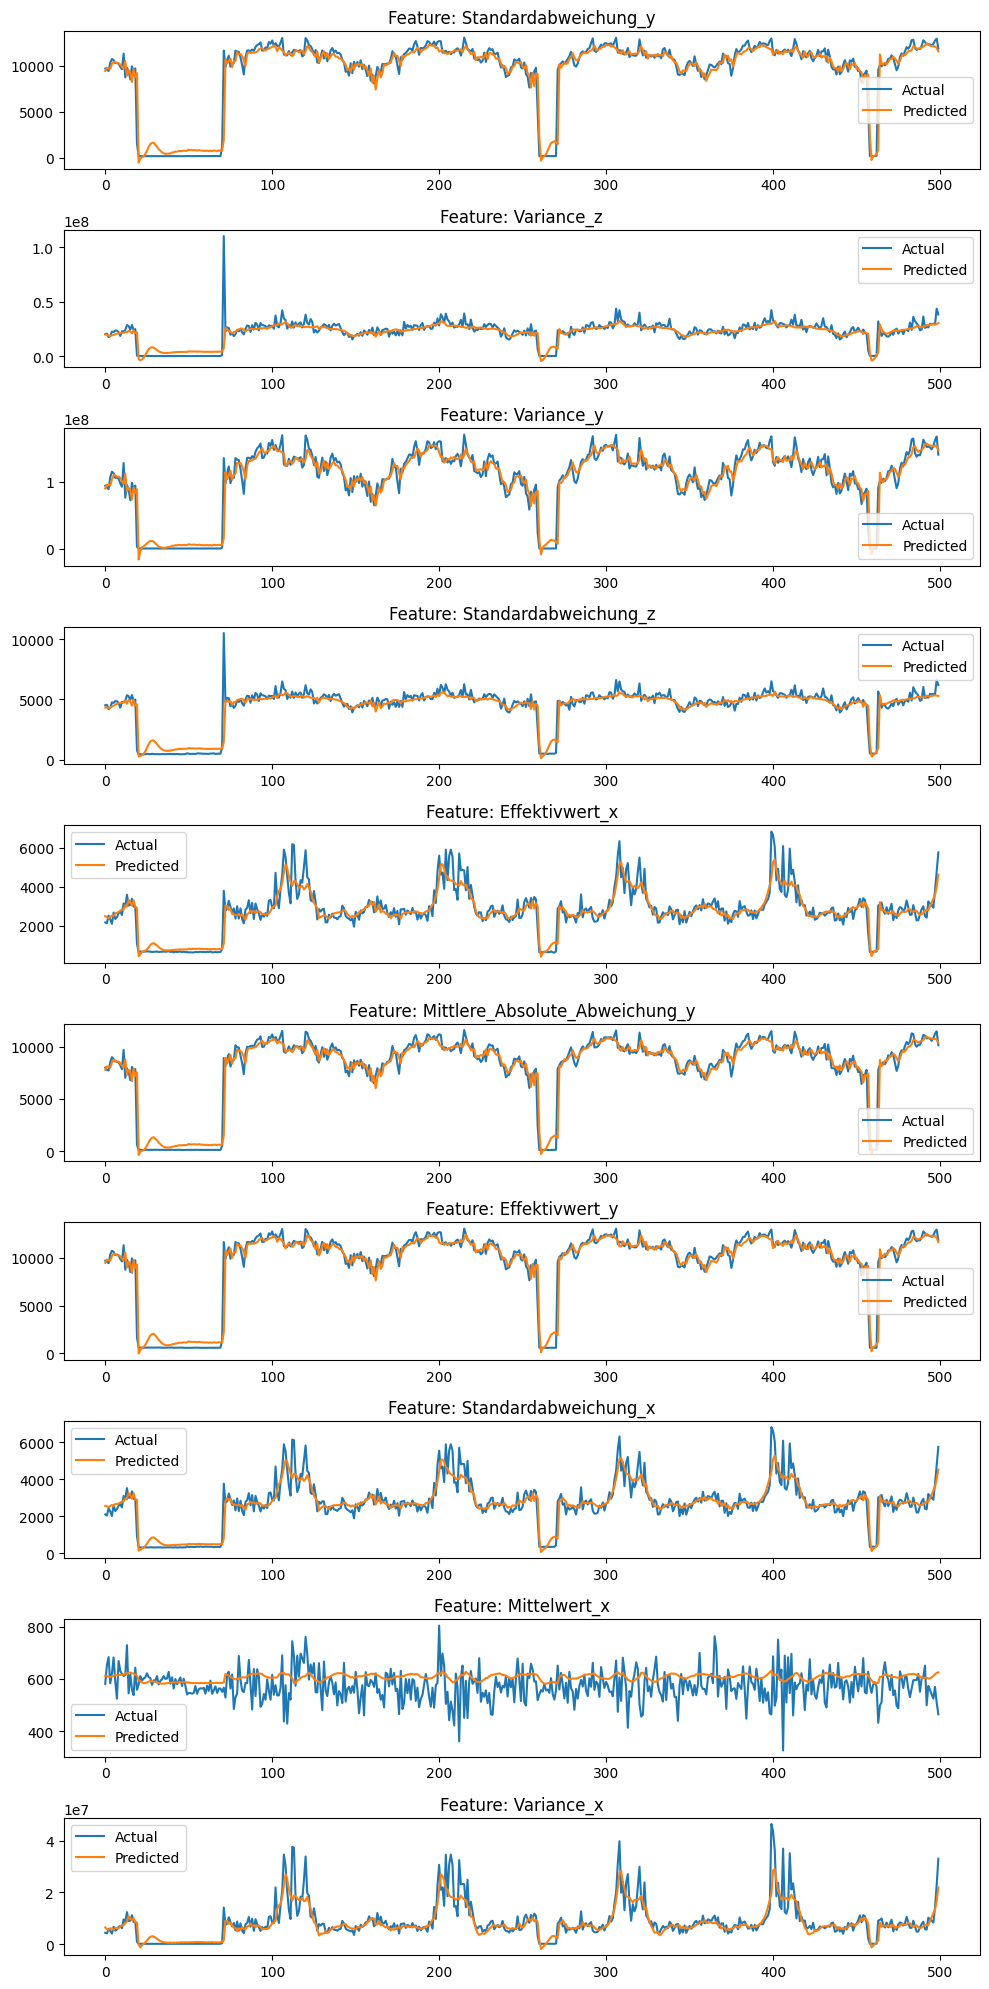

In [35]:
# plot and compare the actual and predicted values for each feature
#torch.save(model.state_dict(), 'lstmb_atch_model.pth')

# print the actual and predicted values for each feature
import matplotlib.pyplot as plt

true_test = scaler.inverse_transform(Y_test)
print(true_test[:20,0])
print(predicted_new[:20,0])
# 创建足够的子图，每个特征一个子图，所有子图排列成一列
fig, axs = plt.subplots(len(features), 1, figsize=(10, 2*len(features)))  # 高度根据特征数量动态调整

for i in range(len(features)):
    # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
    ax = axs[i] if len(features) > 1 else axs
    
    ax.plot(true_test[:, i], label='Actual')
    ax.plot(predicted_actual[:, i], label='Predicted')
    ax.set_title(f'Feature: {features[i]}')
    ax.legend()

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()


# Plot function

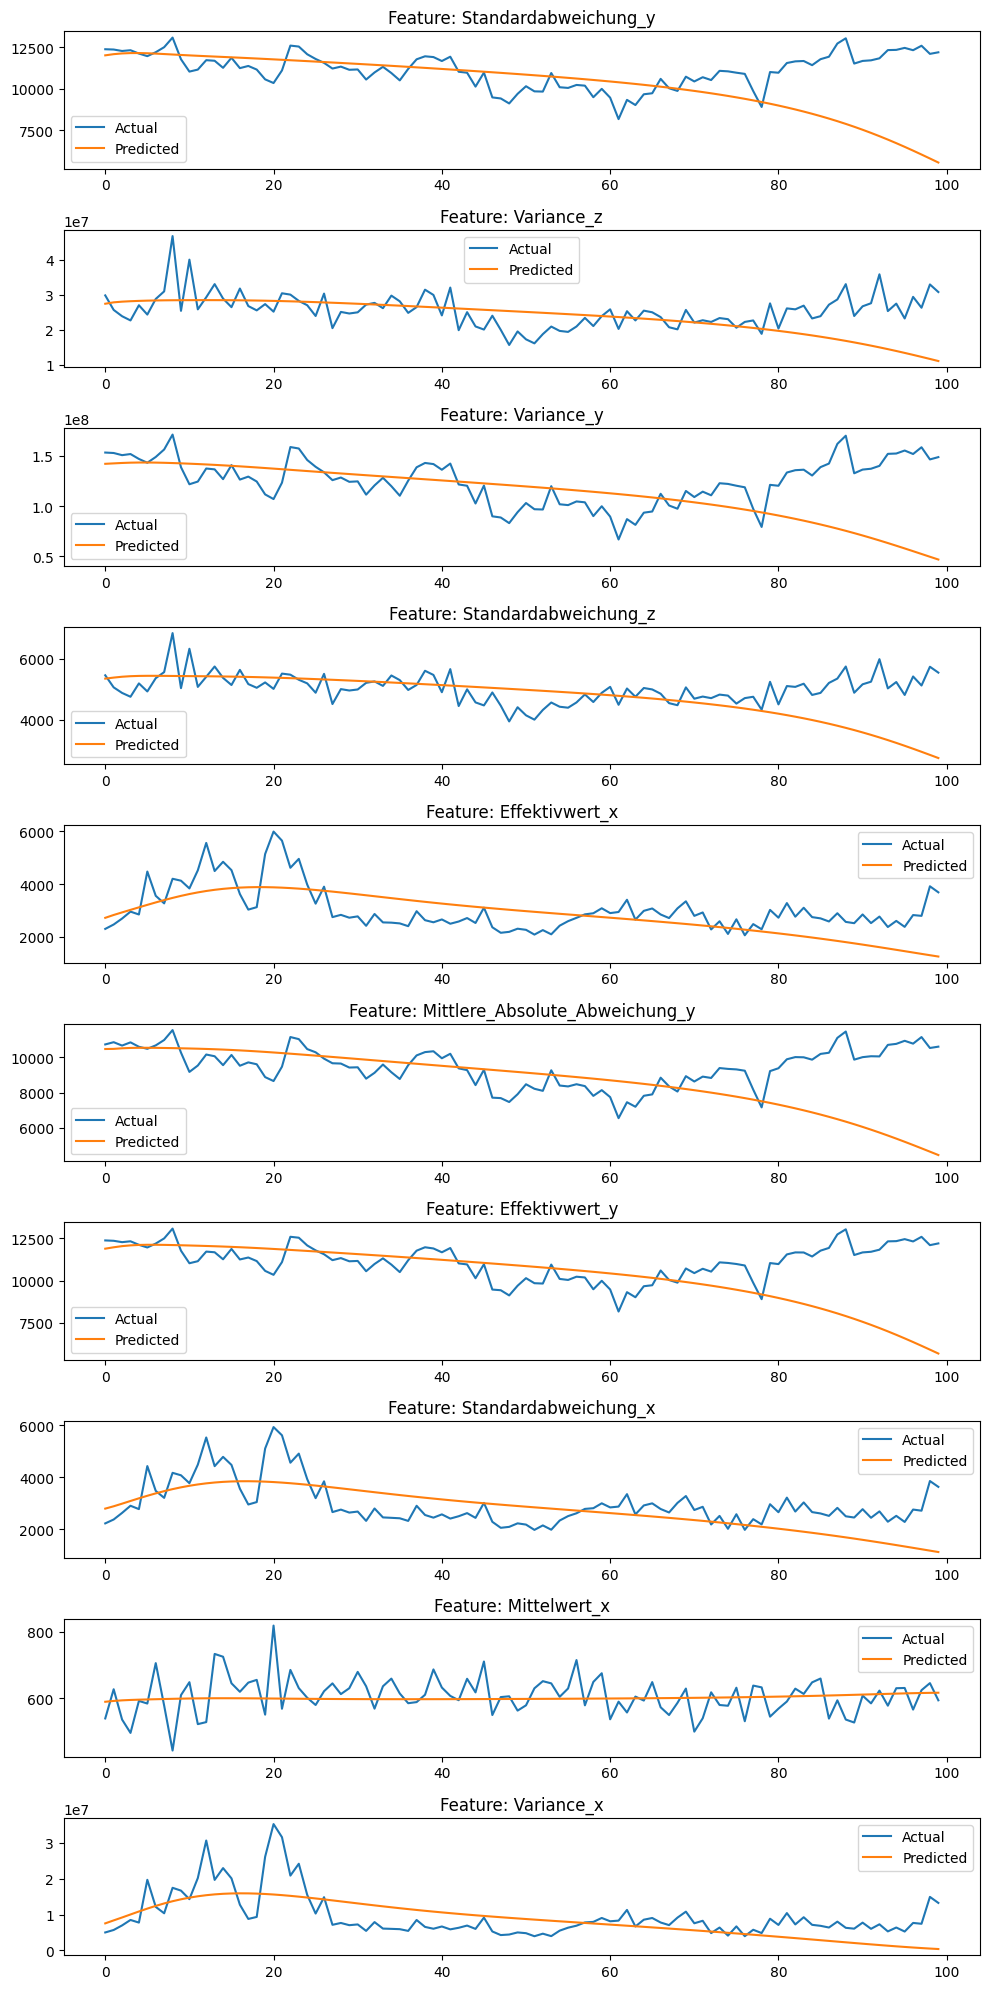

In [15]:
import matplotlib.pyplot as plt

true_test = scaler.inverse_transform(Y_test)
# 创建足够的子图，每个特征一个子图，所有子图排列成一列
fig, axs = plt.subplots(len(features), 1, figsize=(10, 2*len(features)))  # 高度根据特征数量动态调整

for i in range(len(features)):
    # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
    ax = axs[i] if len(features) > 1 else axs
    
    ax.plot(true_test[:, i], label='Actual')
    ax.plot(predicted_new[:, i], label='Predicted')
    ax.set_title(f'Feature: {features[i]}')
    ax.legend()

plt.tight_layout()  #adjust the parameter automatically and full fill the layout
plt.show()


# Set batch size and early stopping

In [75]:
def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, patience=10):
    # patience参数是我们愿意等待验证损失改善的epoch数量
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        
        # 在验证集上评估模型
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in validation_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(validation_loader)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}')

        # 检查验证损失是否改善
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Early stopping at epoch {epoch+1}')
                break  # 提前停止

# 调用训练函数
# 注意：你需要创建一个validation_loader，类似于train_loader，但用于验证数据集
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=200, patience=10)


tensor([0.6178, 0.1170, 0.3859, 0.3210, 0.2469, 0.6122, 0.6129, 0.2468, 0.6841,
        0.0695, 0.2633, 0.3261])

In [2]:
import torch
torch.cuda.is_available()


True

# Informer

In [25]:
import os
import numpy as np
import pandas as pd

# Check if the file exists
file_path = r"D:\studydata\Masterarbeit\Data\withoutR\axis2_demo_tablepart1.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print(len(data))
else:
    print("File not found: ", file_path)


200000


1445996


In [32]:
all_data.head()

,ID,Schadensklasse,Mittelwert_x,Mittelwert_y,Mittelwert_z,Variance_x,Variance_y,Variance_z,Effektivwert_x,Effektivwert_y,...,Mittlere_Absolute_Abweichung_x,Mittlere_Absolute_Abweichung_y,Mittlere_Absolute_Abweichung_z,Zentrales_Moment_x,Zentrales_Moment_y,Zentrales_Moment_z,Median_x,Median_y,Median_z,Timestamp
0,1,0,-177.408,-252.928,15984.9,5041400.0,15494300.0,9395760,2251.18,3942.43,...,1774.61,3167.78,2449.09,0,0,0,-256,-256,15872,1659350000
1,2,0,-44.800,-264.448,15994.6,10140200.0,14388300.0,10129400,3183.09,3800.50,...,2671.12,3010.34,2541.33,0,0,0,0,-256,16128,1659350000
2,3,0,-86.784,-208.384,16032.0,9891810.0,9637760.0,8111400,3144.75,3109.91,...,2653.94,2476.91,2309.82,0,0,0,-256,-256,16128,1659350000
3,4,0,-140.800,-263.936,16030.7,9128820.0,10514200.0,7534970,3023.16,3251.67,...,2463.10,2582.97,2187.67,0,0,0,0,-256,16128,1659350000
4,5,0,-70.912,-218.368,15976.7,7012700.0,10120400.0,8313280,2647.78,3187.16,...,2142.65,2534.47,2290.18,0,0,0,0,-256,16128,1659350000


In [ ]:
# combine all the csv files in the folder
import pandas as pd
import os
from pathlib import Path
import csv
import numpy as np
datapath=Path(r'D:\studydata\Masterarbeit\Data\withoutR')
data_name=os.listdir(datapath)
filepath=[]
for file in data_name:
    if file.endswith('.csv'):
       filepath.append(os.path.join(datapath,file))
filepath

data=filepath[-1]
df=pd.read_csv(data)



In [2]:
import pandas as pd

df=pd.read_csv(r'all_rows.csv')
df.shape

(188, 2)